# What holds the key to our Happiness? 

In this project we are going to analyze the World Happiness Report and try to find what are the major drivers for the top happiest countries. We will visualize the happiness score of people around the world across 158 countries and understand what each of them feels happiness dictates in their given circumstances. 

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pycountry_convert as pc
import folium
import matplotlib.pyplot as plt
import scipy.stats as stats

## Load Data

In [2]:
##read all data files

data_2015 = pd.read_csv('2015.csv')
data_2016 = pd.read_csv('2016.csv')
data_2017 = pd.read_csv('2017.csv')
data_2018 = pd.read_csv('2018.csv')
data_2019 = pd.read_csv('2019.csv')

In [3]:
data_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
data_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [5]:
data_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [6]:
data_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [7]:
data_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## Making the column names same and combining into one dataframe

In [8]:
data_2015['Year']=2015
data_2015 = data_2015.drop(['Region','Standard Error','Dystopia Residual'],axis=1)

In [9]:
data_2015.columns.to_list()

['Country',
 'Happiness Rank',
 'Happiness Score',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Year']

In [10]:
data_2015 = data_2015[['Country',
 'Happiness Rank',
 'Happiness Score',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Generosity',
 'Trust (Government Corruption)',
 'Year']]

In [11]:
data_2015.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [12]:
data_2016['Year']=2016
data_2016 = data_2016.drop(['Region','Lower Confidence Interval','Upper Confidence Interval','Dystopia Residual'],axis=1)

In [13]:
data_2016 = data_2016[['Country',
 'Happiness Rank',
 'Happiness Score',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Generosity',
 'Trust (Government Corruption)', 'Year']]

In [14]:
data_2016.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.36171,0.44453,2016
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.28083,0.41203,2016
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.47678,0.14975,2016
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.37895,0.35776,2016
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.25492,0.41004,2016


In [15]:
data_2017['Year']=2017
data_2017 = data_2017.drop(['Whisker.high','Whisker.low','Dystopia.Residual'],axis=1)
data_2017 = data_2017.rename(columns={'Economy..GDP.per.Capita.':'Economy (GDP per Capita)',
                          'Health..Life.Expectancy.':'Health (Life Expectancy)',
                          'Trust..Government.Corruption.':'Trust (Government Corruption)',
                          'Happiness.Rank':'Happiness Rank','Happiness.Score': 'Happiness Score'})

In [16]:
data_2017.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017


In [17]:
data_2018.head()
data_2018.columns.to_list()

['Overall rank',
 'Country or region',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [18]:
data_2018['Year'] = 2018
data_2018 = data_2018[['Country or region',
 'Overall rank',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption', 'Year']]
data_2018.columns = data_2015.columns.to_list()

In [19]:
data_2019['Year']=2019
data_2019 = data_2019[['Country or region',
 'Overall rank',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption','Year']]
data_2019.columns = data_2015.columns.to_list()

In [20]:
data_2019.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [21]:
df = pd.concat([data_2015,data_2016,data_2017,data_2018,data_2019],axis=0)

In [22]:
df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [23]:
df.Country.unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [24]:
df['Country'] = df['Country'].replace('United States', 'United States of America')
df= df[df.Country != 'Kosovo']

In [25]:
df['Country_1'] = df['Country']
df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year,Country_1
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,Switzerland
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,Iceland
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,Denmark
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015,Norway
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015,Canada


In [26]:
df['Country_1'] = df['Country_1'].replace('Northern Cyprus', 'Cyprus')
df['Country_1'] = df['Country_1'].replace('North Cyprus', 'Cyprus')
df['Country_1'] = df['Country_1'].replace(['Congo (Kinshasa)','Congo (Brazzaville)'],'Congo')
df['Country_1'] = df['Country_1'].replace('North Macedonia', 'Macedonia')
df['Country_1'] = df['Country_1'].replace('Somaliland Region', 'Somaliland')
df['Country_1'] = df['Country_1'].replace('Somaliland region', 'Somaliland')
df['Country_1'] = df['Country_1'].replace('Palestinian Territories','Palestine')
df['Country_1'] = df['Country_1'].replace('Taiwan Province of China','Taiwan')
df['Country_1'] = df['Country_1'].replace('Hong Kong S.A.R., China','Hong Kong')
df['Country_1'] = df['Country_1'].replace('Trinidad & Tobago','Trinidad and Tobago')

In [27]:
data_continent = []
for country in df.Country_1:
    country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
    continent_name = pc.country_alpha2_to_continent_code(country_code)
    data_continent.append([country,continent_name])
data_continent = pd.DataFrame(data_continent)

In [28]:
data_continent.columns = ['Country','Continent']
df.reset_index(inplace=True)

In [29]:
df = pd.concat([data_continent,df],axis=1)
df.head()

,Country,Continent,index,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year,Country_1
0,Switzerland,EU,0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,Switzerland
1,Iceland,EU,1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,Iceland
2,Denmark,EU,2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,Denmark
3,Norway,EU,3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015,Norway
4,Canada,NA,4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015,Canada


In [30]:
df.Continent.value_counts()

AS    230
AF    221
EU    195
NA     69
SA     52
OC     10
Name: Continent, dtype: int64

In [31]:
df['Continent'] = df['Continent'].replace(['AF'],'Africa')
df['Continent'] = df['Continent'].replace(['AS'],'Asia')
df['Continent'] = df['Continent'].replace(['EU'],'Europe')
df['Continent'] = df['Continent'].replace(['NA'],'North America')
df['Continent'] = df['Continent'].replace(['SA'],'South America')
df['Continent'] = df['Continent'].replace(['OC'],'Oceania')

In [32]:
df = df.drop(columns=['index','Country_1'])
df = df.loc[:,~df.columns.duplicated()]
df.head()

,Country,Continent,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,Switzerland,Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


## Missing Values

In [33]:
df.isnull().sum()

Country                          0
Continent                        0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    1
Year                             0
dtype: int64

In [34]:
df = df.dropna()

## Prepare dataframe for folium Map

In [35]:
hist_indicator =  'Happiness Rank'
hist_year = 2019

In [36]:
country_geo = 'world-countries.json'

## Happiness score around the world 

In [37]:
m = folium.Map(location=[-50,50], zoom_start=2,tiles='mapboxbright')

choropleth = folium.Choropleth(
    geo_data=country_geo,
    data=df,
    columns=['Country', 'Happiness Score'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    nan_fill_color='gray',
    nan_fill_opacity=0.4,
    #marker=folium.Circle(location=None, fill=True, radius=False, fill_opacity=0.5),
    #tooltip=folium.GeoJsonTooltip(fields=['Country','Economy (GDP per Capita)','Happiness Score'],
                                             #aliases=['<div style="background-color: lightyellow; color: black; padding: 3px; border: 2px solid black; border-radius: 3px;">'+item+'</div>' for item in ['Country','Economy (GDP per Capita)','Happiness Score']],
                                             #style="font-family: san serif;",
                                            #localize=True), 
    name='Happiness Score',
    #show=False,
    highlight=True,
    
).add_to(m)

# The underlying GeoJson and StepColormap objects are reachable
print(type(choropleth.geojson))
print(type(choropleth.color_scale))

folium.LayerControl(collapsed=False).add_to(m)

m

<class 'folium.features.GeoJson'>
<class 'branca.colormap.StepColormap'>


From the above visualization we can say that: 
 * The Nordic countries are the happiest along with Australia,New Zealand, Canada and part of Western Europe. 
 * Eatern Europe and most of part of Asia and South America lies in the middle. 
 * Africa seems to be the least happiest

## Distribution of Happiness Score over the last 5 years

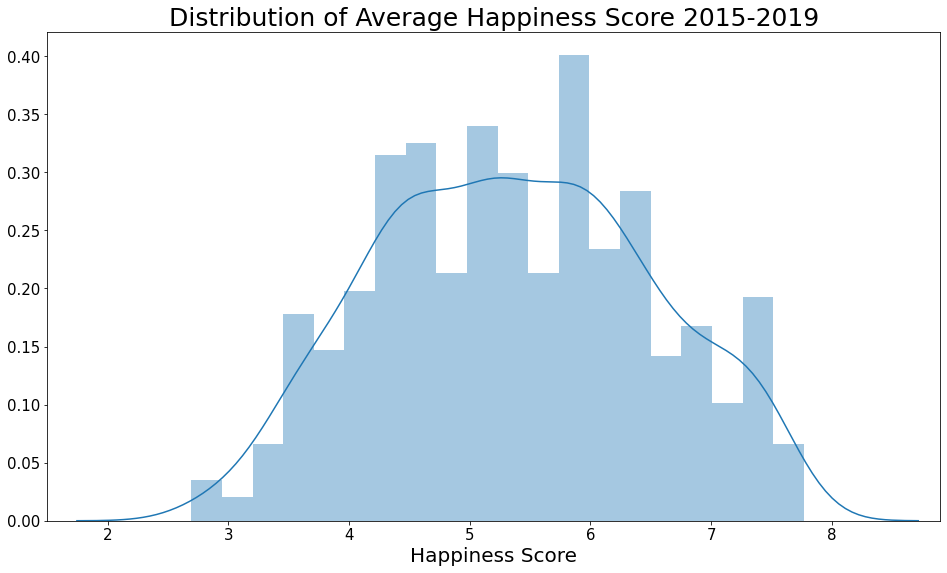

In [38]:
# Checking the distribution for Happiness Score
plt.figure(figsize = (16, 9))

sns.distplot(df['Happiness Score'], bins = 20, kde = True)
plt.xlabel('Happiness Score', fontsize = 20)
plt.title('Distribution of Average Happiness Score 2015-2019', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim((1.5, 8.9));

## Distribution of the various drivers of happiness over the last 5 years

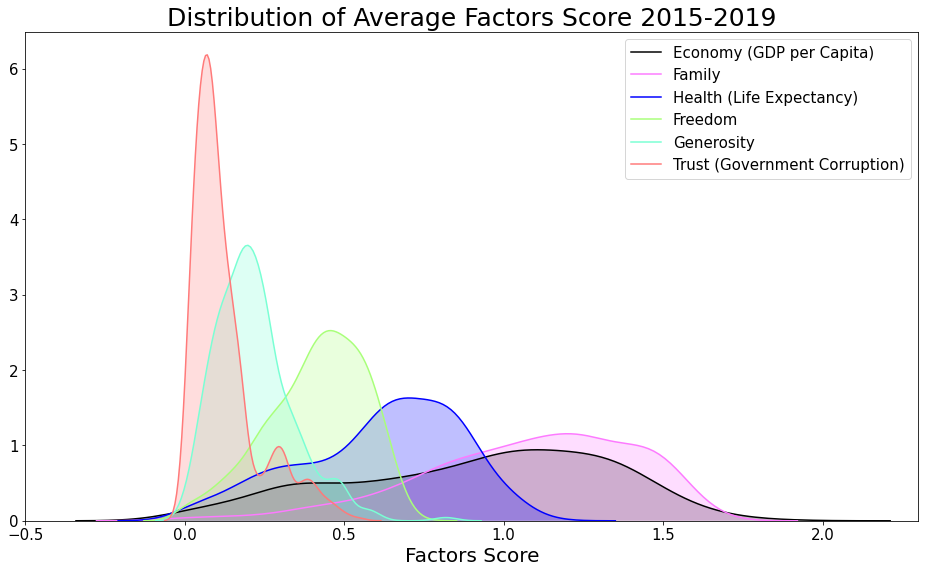

In [39]:
plt.figure(figsize = (16, 9))

sns.kdeplot(data = df['Economy (GDP per Capita)'], color = "k", shade = True)
sns.kdeplot(data = df['Family'], color = "#FD7AFF", shade = True)
sns.kdeplot(data = df['Health (Life Expectancy)'], color = "blue", shade = True)
sns.kdeplot(data = df['Freedom'], color = "#A9FF7A", shade = True)
sns.kdeplot(data = df['Generosity'], color = "#7AFFD4", shade = True)
sns.kdeplot(data = df['Trust (Government Corruption)'], color = "#FF7A7A", shade = True)

plt.xlabel('Factors Score', fontsize = 20)
plt.title('Distribution of Average Factors Score 2015-2019', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim((-0.5, 2.3))
plt.legend(fontsize = 15);

## Variations of the factors over time

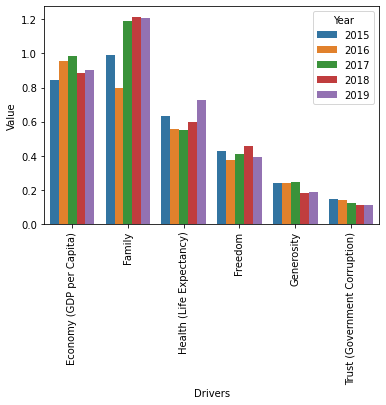

In [40]:
yearly_avg = df.groupby('Year').mean().reset_index()
yearly_avg_drivers = yearly_avg.drop(['Happiness Rank','Happiness Score'],axis=1)
drivers = ['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']
yearly_avg_drivers = pd.melt(yearly_avg_drivers,id_vars='Year',var_name='Drivers', value_name='Value')
sns.barplot(x='Drivers',y='Value',hue='Year',data=yearly_avg_drivers)
plt.xticks(rotation=90)
plt.show()

## Correlation between Happiness score and the drivers

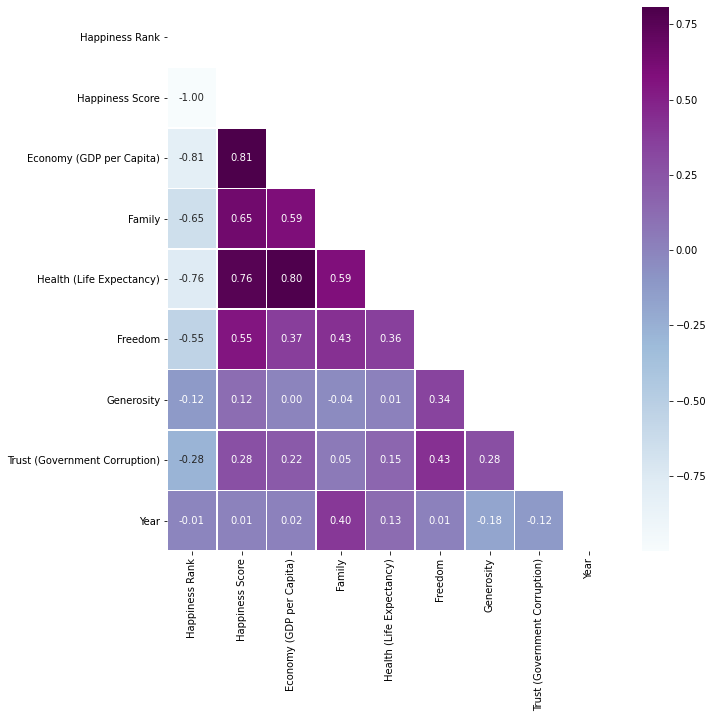

In [41]:
# Generate a mask for the upper triangle
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr , cmap = "BuPu" , annot = True , linewidth = .5 , fmt= ".2f" ,mask=mask );
plt.show()

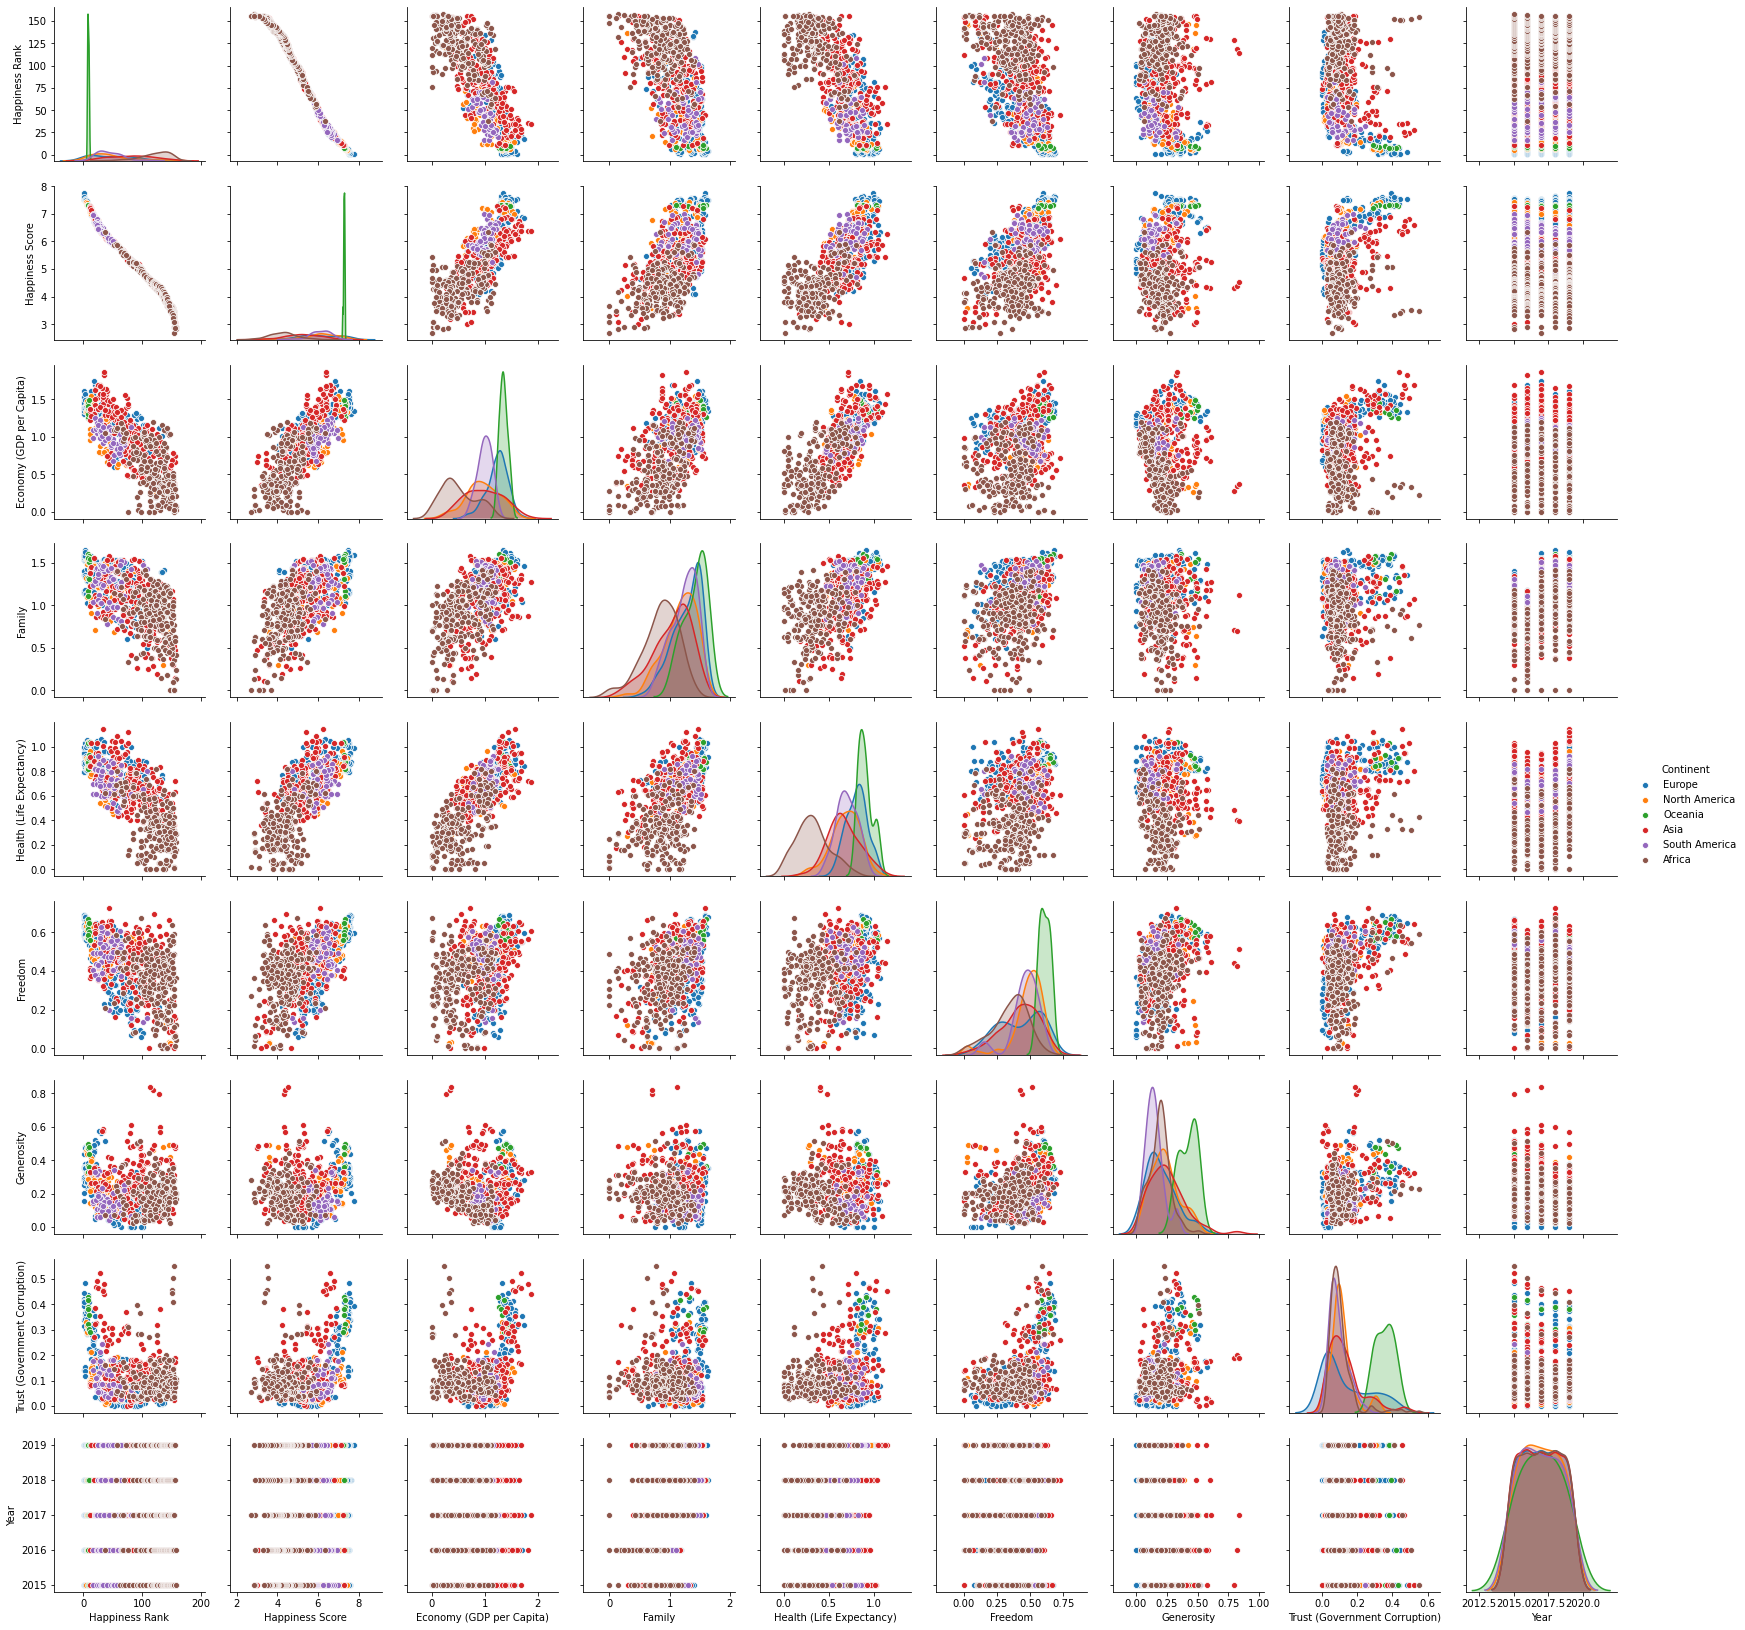

In [42]:
sns.pairplot(data=df,hue='Continent')

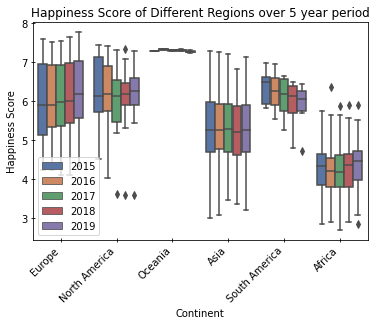

In [43]:
sns.boxplot(data=df, x="Continent", y="Happiness Score", hue="Year",palette = 'deep')
plt.tick_params(direction='inout')
plt.xticks( rotation=45, ha='right')
plt.title('Happiness Score of Different Regions over 5 year period')
plt.legend(loc='lower left')
plt.show()

* From the boxplot it is obvious that people in Ocenaia are very happy overall. 
* In Europe, the median happiness of people have increased and the lower quartile also moved up but the upper quartile has not changed much. Although there is still a high variation, more people are becoming happier in Europe over the course of these 5 years. 
* In North America the interquartile range is narrowing which suggests more people are . feeling close to the median happiness of that region. 
* In South America we see a declining trend of the median happiness. 
* Asia has the highest variance. The median and interquartile range seemed to be unchanged over the 5 year period. 
* Africa is indeed the least happy continent with lower median happiness. Given a number of countries are in Africa, there are a number of outliers on both ends. 

Let's take a closer look at the 3 top drivers of Happiness across the different continents in last year.

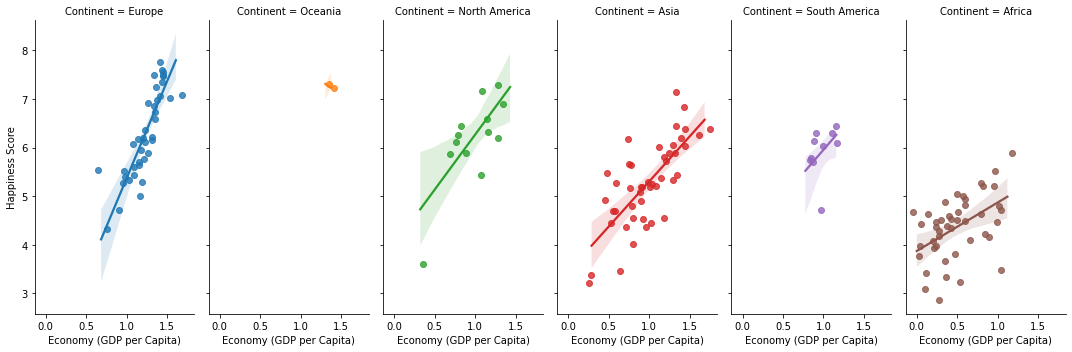

In [44]:
sns.lmplot(x='Economy (GDP per Capita)',y='Happiness Score',hue="Continent", col="Continent",
           data=df[df['Year'] == 2019],height=5, aspect=.5, x_jitter=.1)
plt.show()

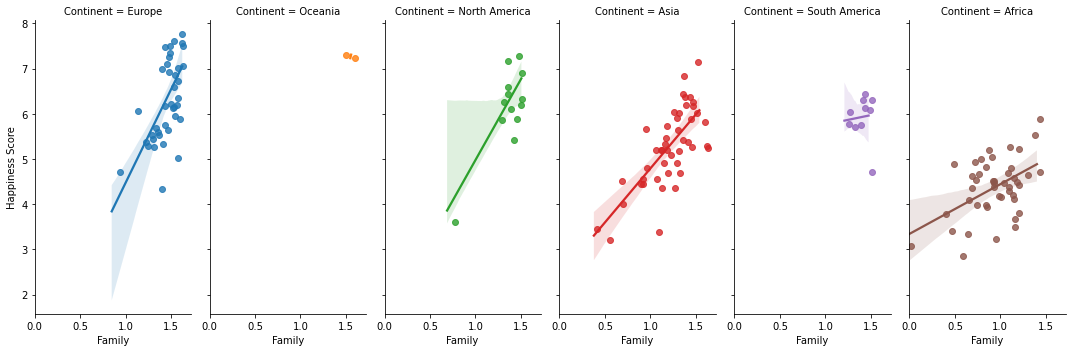

In [45]:
sns.lmplot(x='Family',y='Happiness Score',hue="Continent", col="Continent",
           data=df[df['Year'] == 2019],height=5, aspect=.5, x_jitter=.1)
plt.show()

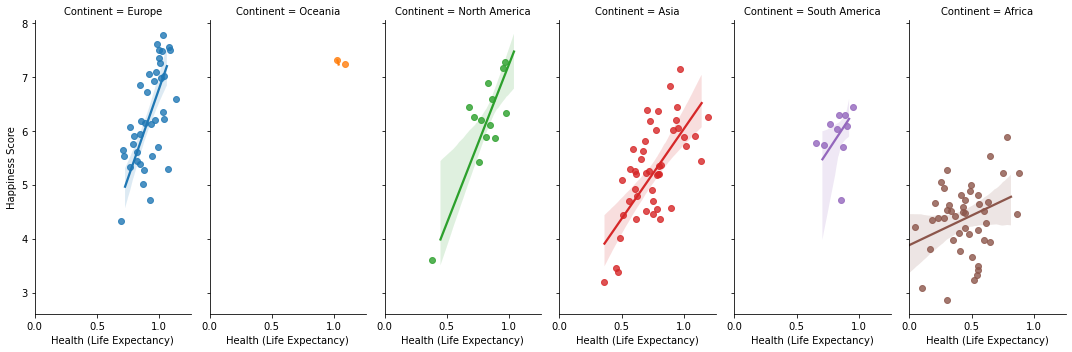

In [46]:
sns.lmplot(x='Health (Life Expectancy)',y='Happiness Score',hue="Continent", col="Continent",
           data=df[df['Year'] == 2019],height=5, aspect=.5, x_jitter=.1)
plt.show()

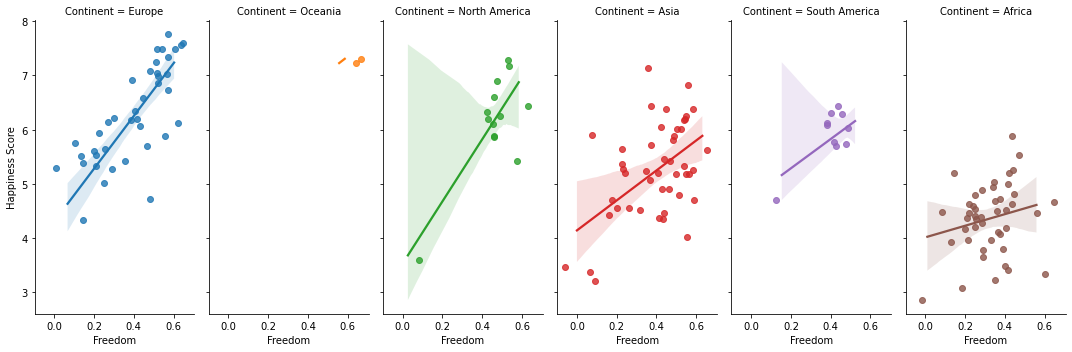

In [47]:
sns.lmplot(x='Freedom',y='Happiness Score',hue="Continent", col="Continent",
           data=df[df['Year'] == 2019],height=5, aspect=.5, x_jitter=.1)
plt.show()

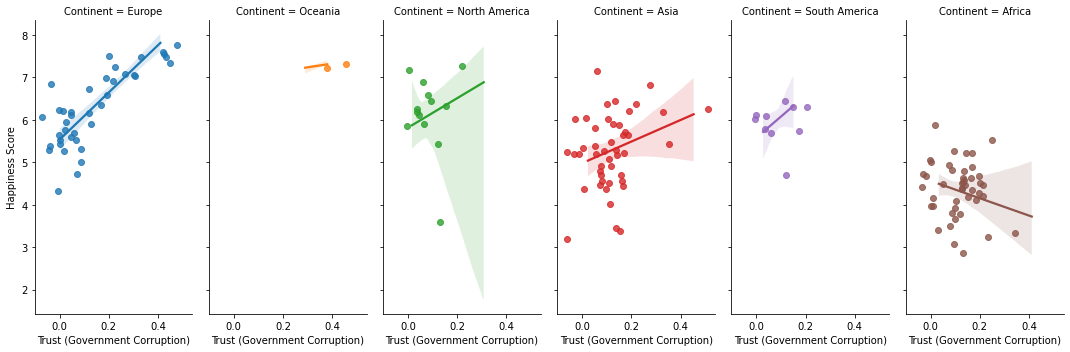

In [48]:
sns.lmplot(x='Trust (Government Corruption)',y='Happiness Score',hue="Continent", col="Continent",
           data=df[df['Year'] == 2019],height=5, aspect=.5, x_jitter=.1)
plt.show()

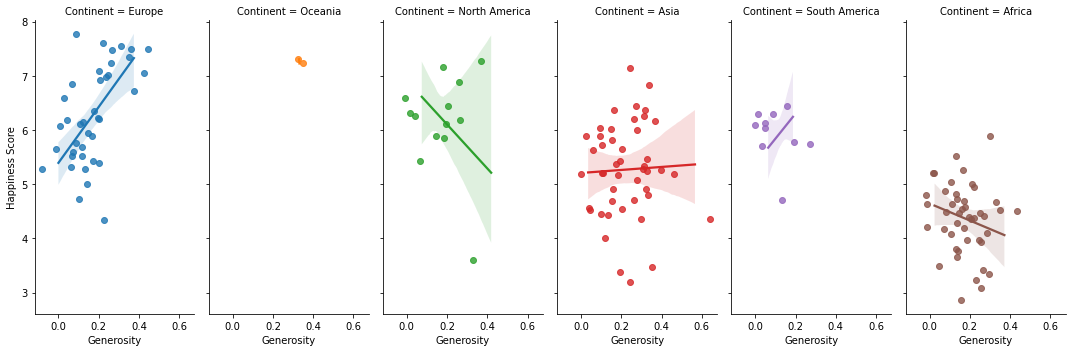

In [49]:
sns.lmplot(x='Generosity',y='Happiness Score',hue="Continent", col="Continent",
           data=df[df['Year'] == 2019],height=5, aspect=.5, x_jitter=.1)
plt.show()

From the plots above it seems like not regions evaluate all factors equally. Let's try to take a closer look at the correlations by region to understand whats going on. 

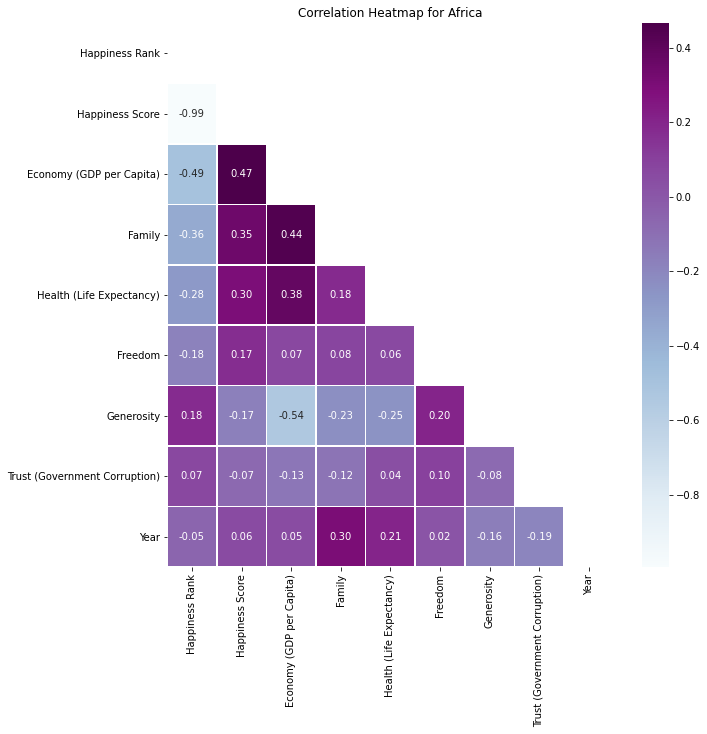

In [50]:
corr = df[df['Continent'] == 'Africa'].corr(method = 'spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr , cmap = "BuPu" , annot = True , linewidth = .5 , fmt= ".2f" ,mask=mask );
plt.title('Correlation Heatmap for Africa')    
plt.show()

People in African Continent places their happiness in economy, family and health expectantc. It makes sense that Africa is lower in the Happiness Score as the overall economy and life expectantcy are low in this region.

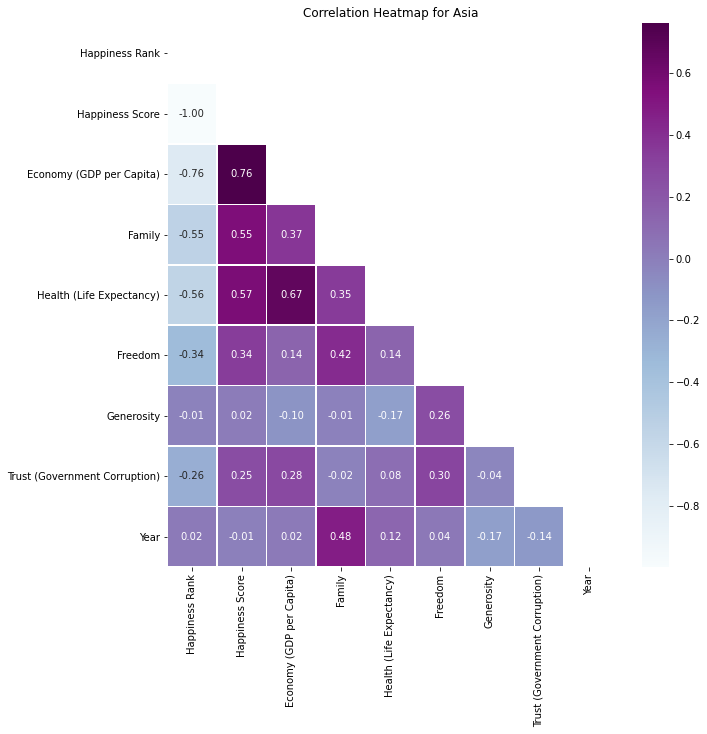

In [51]:
corr = df[df['Continent'] == 'Asia'].corr(method = 'spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr , cmap = "BuPu" , annot = True , linewidth = .5 , fmt= ".2f" ,mask=mask );
plt.title('Correlation Heatmap for Asia')    
plt.show()

People in Asian continent are mostly developing countries with growing economy. They are also seeing the benefits of economy translated into a higher life expectancy. In general people have a fair amount of freedom and trust in government. This reflects in their happiness score as well. Although Asia has a number of poor countires China which is one of the growing economy and a large population might be a possible reason for the result.

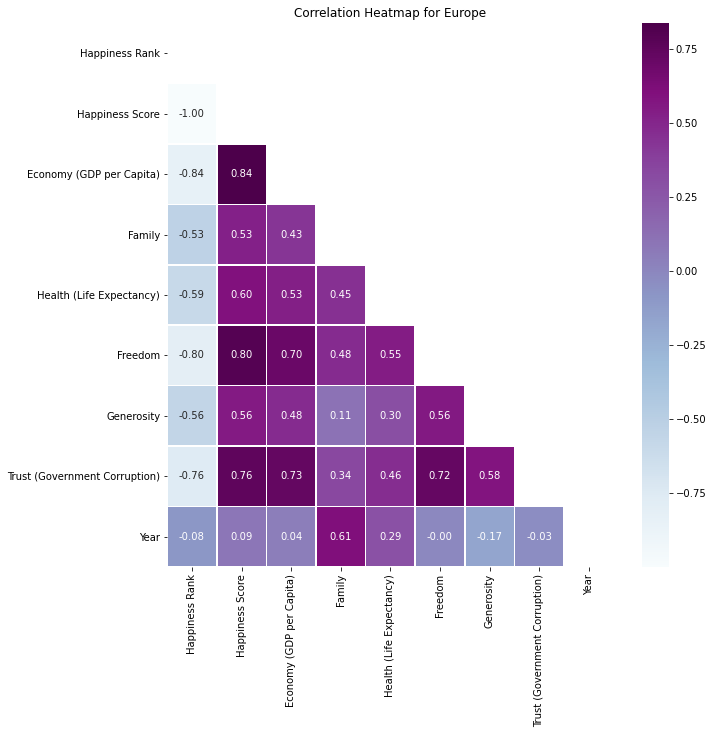

In [52]:
corr = df[df['Continent'] == 'Europe'].corr(method = 'spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr , cmap = "BuPu" , annot = True , linewidth = .5 , fmt= ".2f" ,mask=mask );
plt.title('Correlation Heatmap for Europe')    
plt.show()

People in Europe seem to emphasisze on all of the factors more than other regions. GIven most part of Europe is developed they are bound to have a high economy. With good life expectancy and freedom they also trust their government and feels generosity as a more contributing factor to their overall happiness.

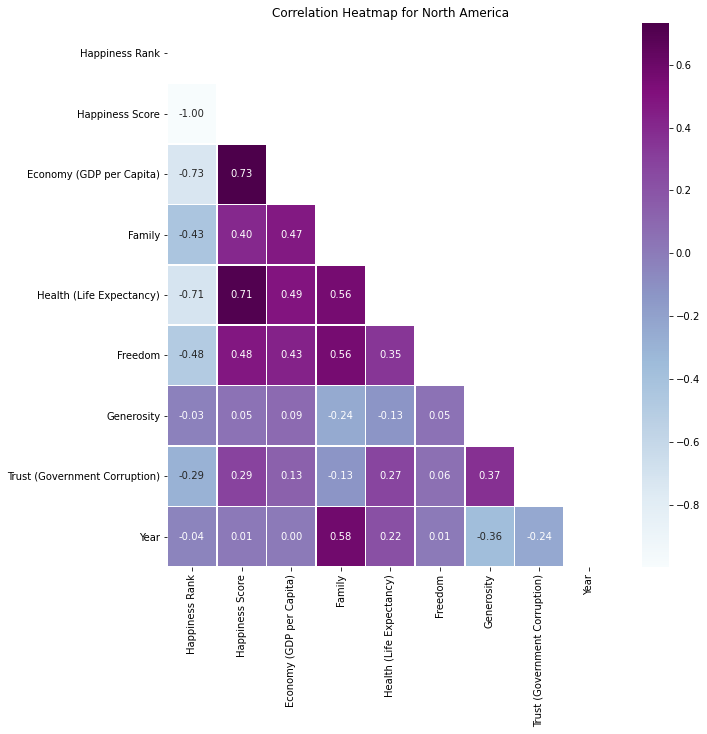

In [53]:
corr = df[df['Continent'] == 'North America'].corr(method = 'spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr , cmap = "BuPu" , annot = True , linewidth = .5 , fmt= ".2f" ,mask=mask );
plt.title('Correlation Heatmap for North America')    
plt.show()

North America seems to reflect he same trend as the overall correlations. Economy is the most important factors followed by health and family.

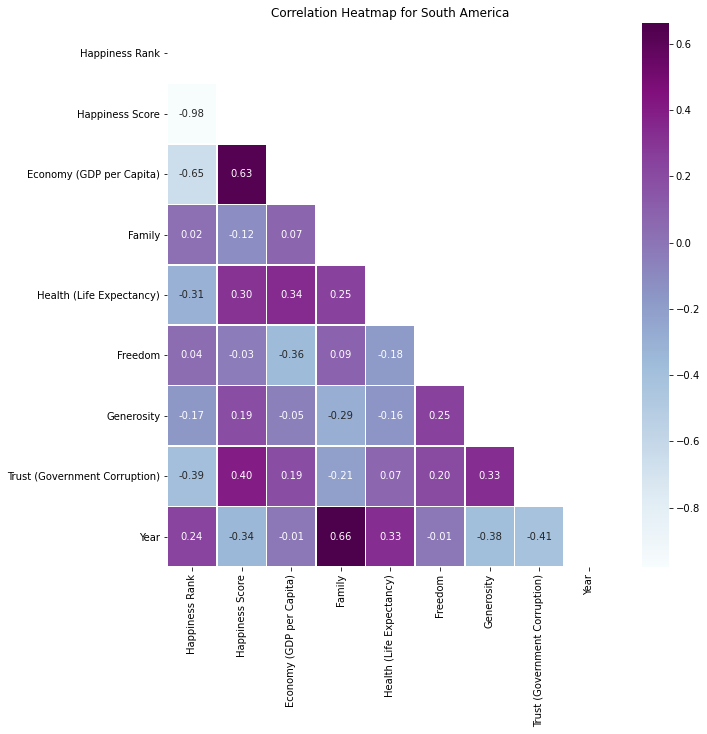

In [54]:
corr = df[df['Continent'] == 'South America'].corr(method = 'spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr , cmap = "BuPu" , annot = True , linewidth = .5 , fmt= ".2f" ,mask=mask );
plt.title('Correlation Heatmap for South America')    
plt.show()

South America has an interesting result. They put more importance on economy, health and trust in government. This could be attributed to the conflicts the region have seen over the years with the government.

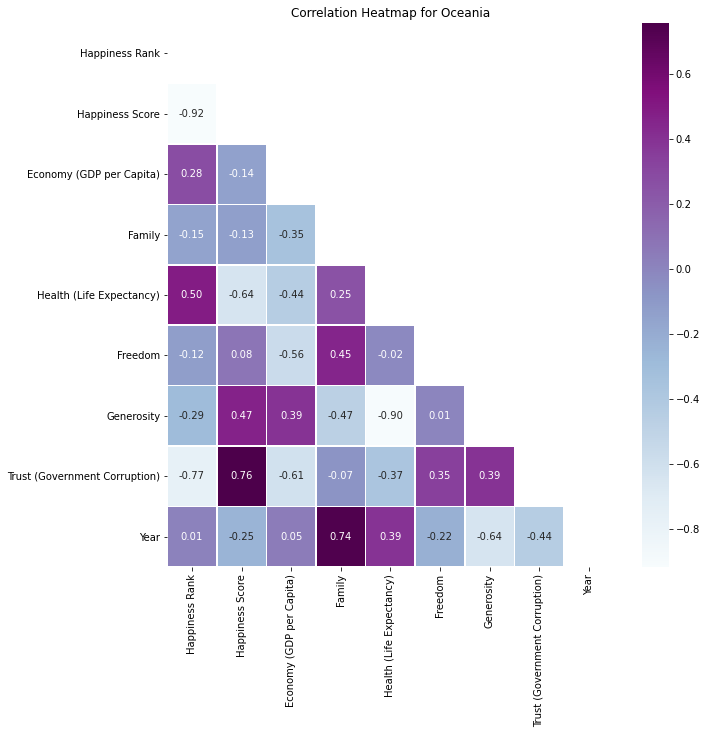

In [55]:
corr = df[df['Continent'] == 'Oceania'].corr(method = 'spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr , cmap = "BuPu" , annot = True , linewidth = .5 , fmt= ".2f" ,mask=mask );
plt.title('Correlation Heatmap for Oceania')    
plt.show()

Australia and New Zealand are the two countries from Oceania. They emphasize the least on economy amd more on trust in government. They also feel generosity is important.

## Top 20 happiest countries of 2019

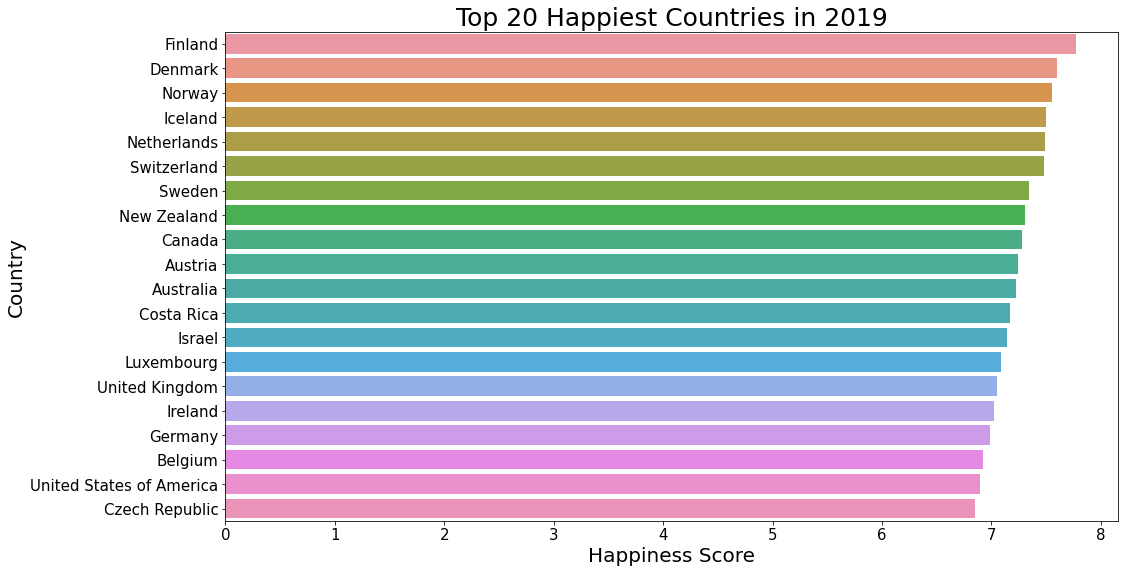

In [56]:
top_20 = df.sort_values(by = ['Year','Happiness Score'], ascending = False).head(20)

plt.figure(figsize = (16, 9))
sns.barplot(y = top_20['Country'], x = top_20['Happiness Score'])

plt.title("Top 20 Happiest Countries in 2019", fontsize = 25)
plt.xlabel("Happiness Score", fontsize = 20)
plt.ylabel("Country", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

Looking at the top 20 happiest countries it is clear that again the Nordic, Australia, New Zealand and the West are the happiest country. Surprisingly, Costa Rica is on the list although they do have lower Economy (GDP per Capita) compared to US, UK and Germany. Perhaps, Economy is not the main driver as observed from the correlations.

## Least 20 Happiest countries of 2019

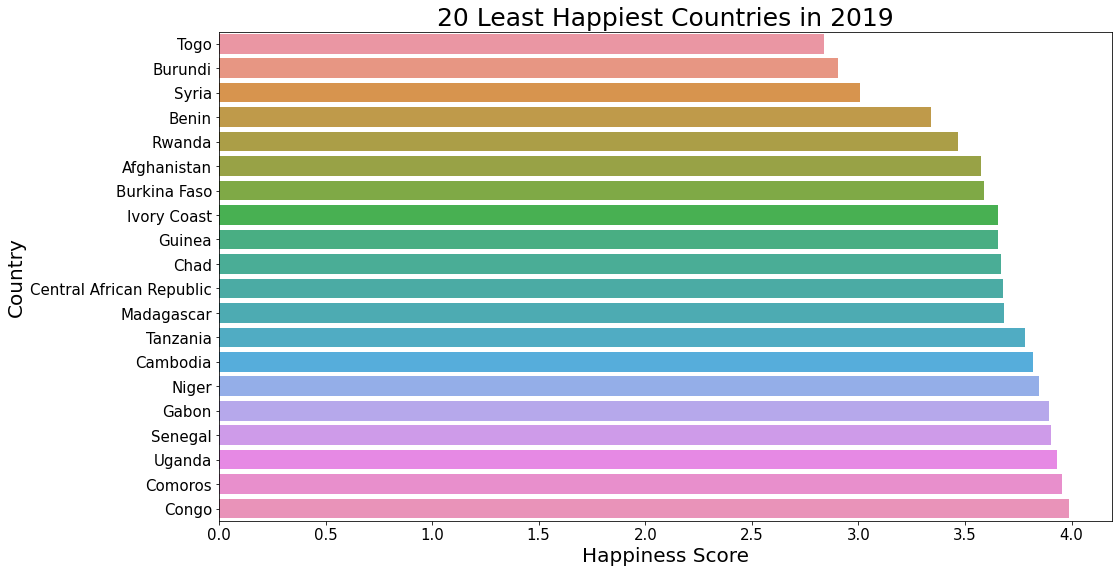

In [57]:
bottom_20 = df.sort_values(by = ['Year','Happiness Score'], ascending = True).head(20)

plt.figure(figsize = (16, 9))
sns.barplot(y = bottom_20['Country'], x = bottom_20['Happiness Score'])

plt.title("20 Least Happiest Countries in 2019", fontsize = 25)
plt.xlabel("Happiness Score", fontsize = 20)
plt.ylabel("Country", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);


The least happiest countries seem to be countries that are in conflict zone. It is obvious as in those areas none of the drivers of happiness are likely to be high.

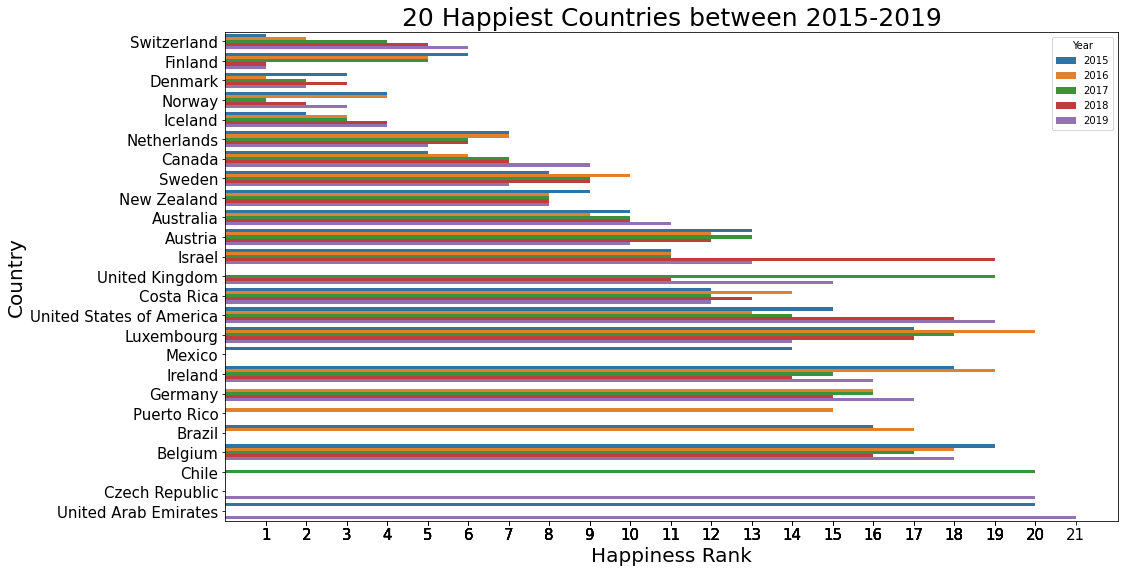

In [58]:
top_20_over_time =  df.sort_values(by = ['Happiness Rank'], ascending = True).head(100)
plt.figure(figsize = (16, 9))
sns.barplot(y = top_20_over_time['Country'], x = top_20_over_time['Happiness Rank'],hue=top_20_over_time['Year'])

plt.title("20 Happiest Countries between 2015-2019", fontsize = 25)
plt.xlabel("Happiness Rank", fontsize = 20)
plt.ylabel("Country", fontsize = 20)
plt.xticks(top_20_over_time['Happiness Rank'],fontsize = 15)
plt.yticks(fontsize = 15);

Countries from the Nordic region and Oceania have been consistently on the top of the list. Brazil and Chile are also on the list. UAE is the only Asian country that made to the top 20. 

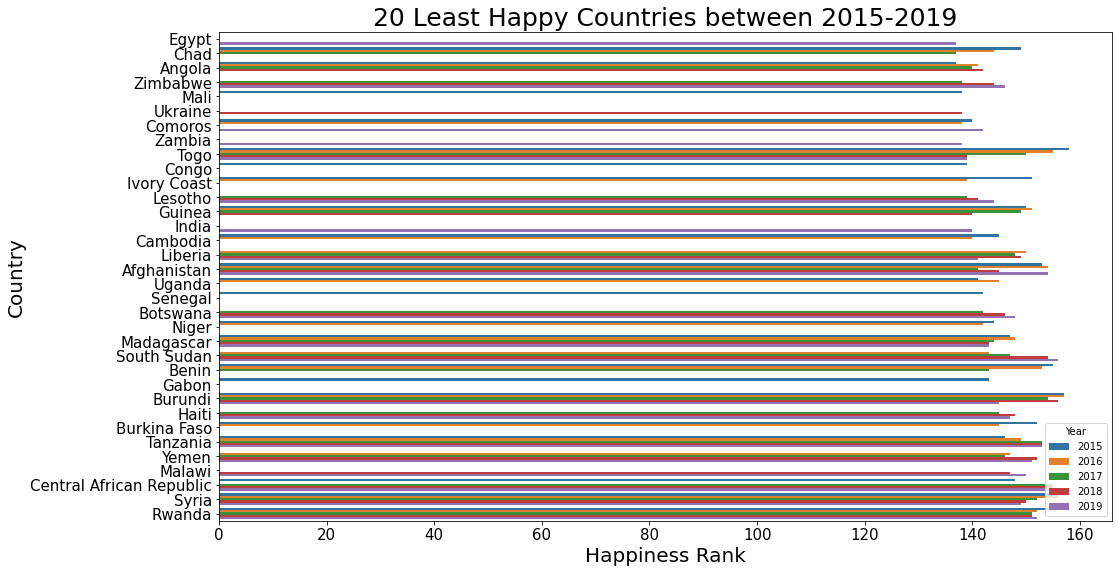

In [59]:
bottom_20_over_time =  df.sort_values(by = ['Happiness Rank'], ascending = True).tail(100)
plt.figure(figsize = (16, 9))
sns.barplot(y = bottom_20_over_time['Country'], x = bottom_20_over_time['Happiness Rank'],hue=bottom_20_over_time['Year'])
plt.title("20 Least Happy Countries between 2015-2019", fontsize = 25)
plt.xlabel("Happiness Rank", fontsize = 20)
plt.ylabel("Country", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

Most of the countries from war affected regions have been consistently on the bottom 20 least. Surprisingly, Egypt, and India are also on this chart for only time from last year. This might be due to the internal conflicts within the country.

In [60]:
tmp_df = df[df['Year'] == 2019]

In [61]:
rank_df = tmp_df.iloc[:,4:10].rank(axis=0,numeric_only=True, method='dense', ascending=False)
rank_df['Country'] = tmp_df['Country']
rank_df['Happiness Score'] = tmp_df['Happiness Score']
rank_df['Overall Driver'] = tmp_df.iloc[:,4:10].rank(axis=0,numeric_only=True, method='dense').idxmax(axis=1)
rank_df['True Driver'] = tmp_df.iloc[:,7:10].rank(axis=0,numeric_only=True, method='dense').idxmax(axis=1)

In [94]:
m = folium.Map(location=[-5,5], zoom_start=2,tiles='mapboxbright')

choropleth = folium.Choropleth(
    geo_data=country_geo,
    data=rank_df,
    columns=['Country','Happiness Score'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    nan_fill_color='gray',
    nan_fill_opacity=0.4,
    #marker=folium.Circle(location=None, fill=True, radius=False, fill_opacity=0.5),
    tooltip=folium.GeoJsonTooltip(fields=['Country', 'Overall Driver'],
                                             aliases=['Country','Overall Driver']), 
    name='Happiness Score',
    show=True,
    highlight=True,
    
).add_to(m)

# The underlying GeoJson and StepColormap objects are reachabl

#folium.LayerControl(collapsed=False).add_to(m)

m